# Проект по SQL: Анализ данных о книгах

# Описание проекта
Проект направлен на проведение анализа данных о книгах, их авторах, издательствах и пользовательских оценках для выявления ключевых тенденций и показателей

# Цель исследования:
 - Определение наиболее популярных книг, издательств и авторов, а также определение таких  показателей как количество обзоров и средняя оценка книг

# Задачи исследования
 - Посчитать количество книг, выпущенных после 1 января 2000 года
 - Для каждой книги определить количество обзоров и среднюю оценку
 - Определить издательство, которое выпустило наибольшее число книг толще 50 страниц
 - Выявить автора с самой высокой средней оценкой книг, учитывая только книги, которые получили 50 и более оценок
 - Рассчитать среднее количество обзоров от пользователей, которые оставили больше 48 оценок

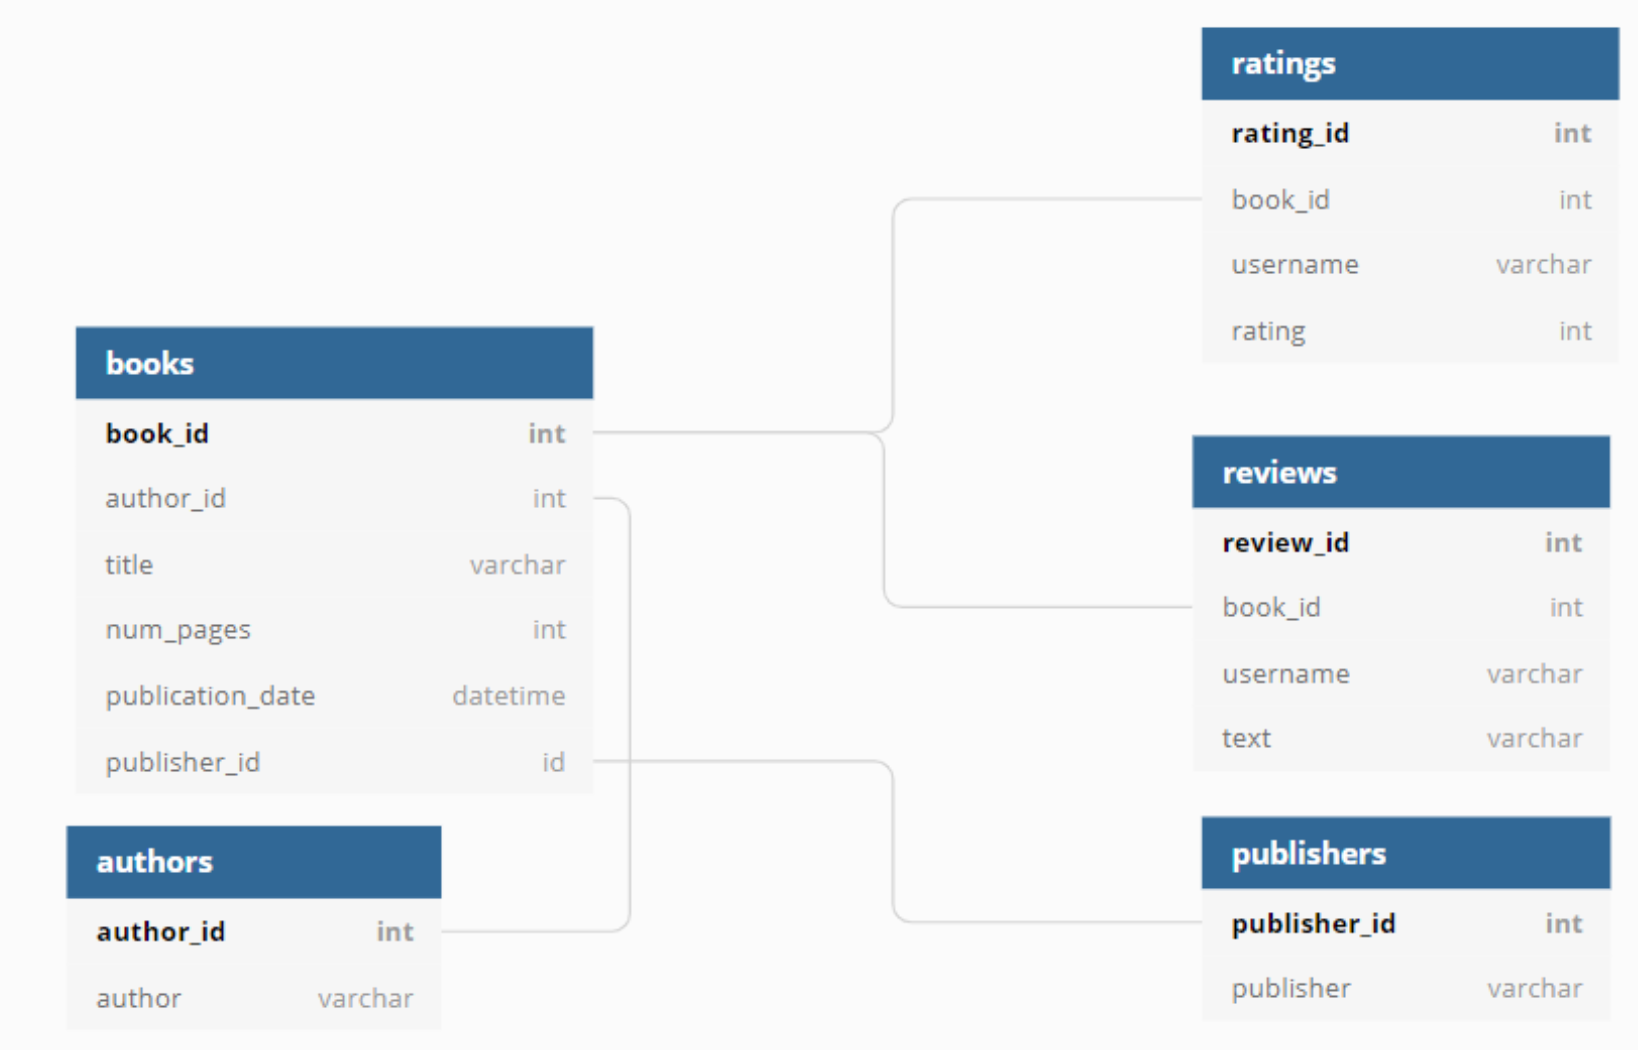

In [1]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa
pd.set_option('display.max_colwidth', None) 

In [3]:
# устанавливаем параметры
db_config = {
            'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db' # название базы данных
            }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

## Исследование таблиц
   - Вывод первых строк из каждой таблицы.
   - Подсчет количества строк в каждой таблице.

In [4]:
query = '''
SELECT * 
FROM books 
LIMIT 5
'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
query = '''
SELECT COUNT(*)
FROM books 
'''
get_sql_data(query)

,count
0,1000


In [6]:
query = '''
SELECT * 
FROM authors
LIMIT 5
'''
get_sql_data(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
query = '''
SELECT COUNT(*)
FROM authors 
'''
get_sql_data(query)

,count
0,636


In [8]:
query = '''
SELECT * 
FROM ratings
LIMIT 5
'''
get_sql_data(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
query = '''
SELECT COUNT(*)
FROM ratings 
'''
get_sql_data(query)

,count
0,6456


In [10]:
query = '''
SELECT * 
FROM reviews
LIMIT 5
'''
get_sql_data(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.


In [11]:
query = '''
SELECT COUNT(*)
FROM reviews 
'''
get_sql_data(query)

,count
0,2793


In [12]:
query = '''
SELECT * 
FROM publishers
LIMIT 5
'''
get_sql_data(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [13]:
query = '''
SELECT COUNT(*)
FROM publishers 
'''
get_sql_data(query)

,count
0,340


1. Таблица `books`:
   - Содержит данные о **1000** книгах, такие как `book_id`, `author_id`, `title`, `num_pages`, `publication_date`, и `publisher_id`.
---
2. Таблица `authors`:
   - Содержит данные о **636** авторах, включая `author_id` и имя автора `author`.
---
3. Таблица `ratings`:
   - Содержит **6456** записей о пользовательских оценках книг, включая поля `rating_id`, `book_id`, `username`, и `rating`.
---
4. Таблица `reviews`:
   - Содержит **2793** записи о пользовательских обзорах на книги, с полями `review_id`, `book_id`, `username`, и `text`.
---
5. Таблица `publishers`:
   - Содержит данные о **340** издательствах, включая `publisher_id` и название издательства `publisher`.

## 1. Определение количества книг, вышедших после 1 января 2000 года.

In [14]:
query = '''
SELECT COUNT(book_id) AS qty
FROM books
WHERE publication_date > '2000-01-01'
'''
get_sql_data(query)

,qty
0,819


- Из 1000 книг, хранящихся в таблице `books`, большая часть книг - 819 были опубликованы после 1 января 2000 года.

## 2. Определение количества обзоров и средней оценки для каждой книги.

In [15]:
#количество обзоров и средняя оценка каждой книги
query = '''
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
'''
get_sql_data(query)

,book_id,title,review_qty,avg_rating
0,1,'Salem's Lot,2,3.666667
1,2,1 000 Places to See Before You Die,1,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope #1),3,4.666667
3,4,1491: New Revelations of the Americas Before Columbus,2,4.500000
4,5,1776,4,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.666667
996,997,Xenocide (Ender's Saga #3),3,3.400000
997,998,Year of Wonders,4,3.200000
998,999,You Suck (A Love Story #2),2,4.500000


In [16]:
#cреднее количество обзоров и рейтинг
query = '''
WITH a AS (
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
)
SELECT AVG (review_qty) AS avg_review_qty,
       AVG (avg_rating) AS avg_rating
FROM a
'''
get_sql_data(query)

,avg_review_qty,avg_rating
0,2.793,3.898973


In [17]:
#книги без обзоров
query = '''
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
HAVING COUNT (DISTINCT rev.review_id)<1
'''
get_sql_data(query)


,book_id,title,review_qty,avg_rating
0,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
1,191,Disney's Beauty and the Beast (A Little Golden Book),0,4.000000
2,221,Essential Tales and Poems,0,4.000000
3,387,Leonardo's Notebooks,0,4.000000
4,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
5,808,The Natural Way to Draw,0,3.000000


In [18]:
#больше всего обзоров
query = '''
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
ORDER BY COUNT (DISTINCT rev.review_id) DESC
LIMIT 1
'''
get_sql_data(query)

,book_id,title,review_qty,avg_rating
0,948,Twilight (Twilight #1),7,3.6625


In [19]:
#количество книг с идеальным рейтингом 
query = '''
WITH a AS (
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
)
SELECT COUNT (*)
FROM a
WHERE avg_rating = 5
'''
get_sql_data(query)

,count
0,44


In [20]:
#худший рейтинг 
query = '''
SELECT b.book_id,
       b.title,
       COUNT (DISTINCT rev.review_id) AS review_qty,
       AVG (rat.rating) AS avg_rating
FROM books AS b 
FULL OUTER JOIN reviews AS rev ON b.book_id = rev.book_id
FULL OUTER JOIN ratings AS rat ON b.book_id = rat.book_id
GROUP BY b.book_id, b.title
ORDER BY avg_rating
LIMIT 1
'''
get_sql_data(query)

,book_id,title,review_qty,avg_rating
0,303,Harvesting the Heart,2,1.5


 - Для каждой книги было посчитано количество обзоров и средняя оценка
 - В среднем книги имеют по **2-3 обзора** и имеют средний рейтинг **3,9**
 - Книги на которые нет обзоров:
     - `Anne Rice's The Vampire Lestat: A Graphic Novel`
     - `Disney's Beauty and the Beast (A Little Golden Book)`
     - `Essential Tales and Poems`
     - `Leonardo's Notebooks`
     - `The Cat in the Hat and Other Dr. Seuss Favorites`
     - `The Natural Way to Draw`
 - Больше всего - 7 обзоров написано на книгу `Twilight (Twilight #1)`
 - **44** книги имеют наивысший рейтинг 5.0
 - Худший рейтинг у книги `Harvesting the Heart` - 1.5


## Определение издательства, которое выпустило наибольшее количество книг толще 50 страниц (чтобы исключить брошюры).

In [21]:
query = '''
SELECT p.publisher, COUNT (b.book_id)
FROM books AS b
JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id
ORDER BY COUNT (b.book_id) DESC
LIMIT 1
'''
get_sql_data(query)

,publisher,count
0,Penguin Books,42


- Издательство `Penguin Books` выпустило наибольшее количество книг толще 50 страниц, — всего 42 книги.


## Определение автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками.

In [22]:
query = '''
WITH book_ids AS (
    SELECT book_id, AVG (rating) AS book_rating
    FROM ratings
    GROUP BY book_id
    HAVING COUNT (rating_id) >=50
    )
SELECT author
FROM books AS b
INNER JOIN book_ids AS id ON b.book_id = id.book_id
JOIN authors AS a ON a.author_id = b.author_id
GROUP BY a.author_id
ORDER BY AVG (book_rating) DESC
LIMIT 1                
'''
get_sql_data(query)

,author
0,J.K. Rowling/Mary GrandPré


In [23]:
query = '''

WITH book_ids AS (
SELECT book_id, AVG (rating) AS book_rating
FROM ratings
GROUP BY book_id
HAVING COUNT (rating_id) >=50
),
author AS (
SELECT a.author_id
FROM books AS b
INNER JOIN book_ids AS id ON b.book_id = id.book_id
JOIN authors AS a ON a.author_id = b.author_id
GROUP BY a.author_id
ORDER BY AVG (book_rating) DESC
LIMIT 1 
)
SELECT b.title, 
       r.book_rating
FROM books AS b 
JOIN book_ids AS r ON r.book_id = b.book_id
WHERE b.author_id IN (SELECT author_id FROM author)
'''
get_sql_data(query)

,title,book_rating
0,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),4.414634
1,Harry Potter and the Half-Blood Prince (Harry Potter #6),4.246575
2,Harry Potter and the Chamber of Secrets (Harry Potter #2),4.287500
3,Harry Potter and the Order of the Phoenix (Harry Potter #5),4.186667


- Книги о Гарри Поттере `J.K. Rowling/Mary GrandPré` имеют самый высокую среднюю оценку книг среди книг с более чем 50 оценками:
     - Гарри Поттер и узник Азкабана
     - Гарри Поттер и Принц-полукровка
     - Гарри Поттер и Тайная комната
     - Гарри Поттер и Орден Феникса


## Определение среднего количества обзоров от пользователей, которые поставили более 48 оценок.

In [24]:
query = '''
WITH a AS (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT (rating_id) > 48
),
b AS (
SELECT COUNT (review_id) AS count_review
FROM a
INNER JOIN reviews as r ON r.username = a.username
GROUP BY a.username
)
SELECT AVG (count_review)
FROM b
'''
get_sql_data(query)

,avg
0,24.0


In [25]:
query = '''
WITH u AS (
SELECT username
FROM ratings
GROUP BY username
HAVING COUNT (rating_id) > 48)
SELECT COUNT (username)
FROM u
'''
get_sql_data(query)

,count
0,13


- 13 пользователей, поставивших более 48 оценок, в среднем написали 24 обзора


**Вывод**

1. **Количество книг**
    - Из 1000 книг 819 были опубликованы после 1 января 2000 года, что свидетельствует о большом количестве современных произведений в библиотеке

2. **Обзоры и оценки**
   - В среднем, книги имеют 2-3 обзора и рейтинг ~ 3.9
   - Книга с наибольшим количеством обзоров — `Twilight` с 7 отзывами
   - 44 книги имеют наивысший рейтинг 5.0

3. **Издательства**: 
    - Издательство `Penguin Books` стало лидером по количеству книг с количеством страниц больше 50, опубликовав 42 книги

4. **Авторы**: 
    - `J.K. Rowling/Mary GrandPré` демонстрирует наивысший средний рейтинг книг среди авторов, у которых книги получили более 50 оценок. Наиболее высокие рейтинги имеют книги из серии о Гарри Поттере.

5. **Обзоры от активных пользователей**: 
    - В среднем, пользователи, поставившие более 48 оценок, написали 24 обзора, что свидетельствует об их активности 
